In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv("framing_emotion_output.csv")

# Combine emotion columns into a single column for multi-class classification
emotion_columns = ["emotion_anger", "emotion_joy", "emotion_optimism", "emotion_sadness"]
df["emotion"] = df[emotion_columns].idxmax(axis=1)  # Get the column with the maximum value as the emotion
df["emotion"] = df["emotion"].str.replace("emotion_", "")  # Remove the prefix 'emotion_'
df = df[["text", "emotion"]].dropna()

# STEP 4: Split data
X = df["text"]
y = df["emotion"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [4]:
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [5]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)

LogisticRegression(max_iter=1000)

In [6]:
y_pred = model.predict(X_test_vec)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8088642659279779

Classification Report:
               precision    recall  f1-score   support

       anger       1.00      0.06      0.12        16
         joy       0.74      0.62      0.67       185
    optimism       0.69      0.26      0.38        42
     sadness       0.83      0.96      0.89       479

    accuracy                           0.81       722
   macro avg       0.81      0.47      0.51       722
weighted avg       0.80      0.81      0.79       722



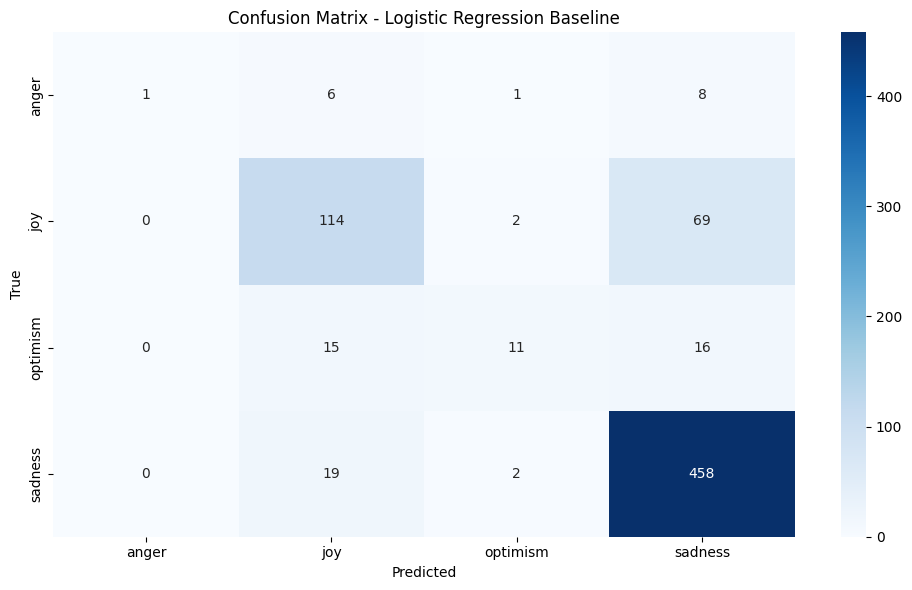

In [7]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=model.classes_, yticklabels=model.classes_, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Logistic Regression Baseline")
plt.tight_layout()
plt.show()